# Visualtion of P79, Aran og FRIC data

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import h5py

### Load data

In [9]:
data_aran_hh = pd.read_csv('../data/raw/reference_data/cph1_aran_hh.csv', sep=';', encoding='unicode_escape')
data_aran_vh = pd.read_csv('../data/raw/reference_data/cph1_aran_vh.csv', sep=';', encoding='unicode_escape')

data_fric_hh = pd.read_csv('../data/raw/reference_data/cph1_fric_hh.csv', sep=';', encoding='unicode_escape')
data_fric_vh = pd.read_csv('../data/raw/reference_data/cph1_fric_vh.csv', sep=';', encoding='unicode_escape')

data_zp_hh = pd.read_csv('../data/raw/reference_data/cph1_zp_hh.csv', sep=';', encoding='unicode_escape')
data_zp_vh = pd.read_csv('../data/raw/reference_data/cph1_zp_vh.csv', sep=';', encoding='unicode_escape')

data_mpd_hh = pd.read_csv('../data/raw/reference_data/cph1_iri_mpd_rut_hh.csv', sep=';', encoding='unicode_escape')
data_mpd_vh = pd.read_csv('../data/raw/reference_data/cph1_iri_mpd_rut_vh.csv', sep=';', encoding='unicode_escape')

Show the car trip as a line plot gif

In [4]:
laser_data = data_zp_hh.to_numpy()[:, 1:26]

time_steps = 100

# Create gif
fig, ax = plt.subplots()

mesh = ax.imshow(laser_data[:time_steps][::-1], cmap='viridis')
cb = plt.colorbar(mesh)
cb.set_label('Distance [mm]')
ax.set_title('Laser data')
plt.tight_layout()

def animate(frame):
    i = frame*15
    mesh.set_data(laser_data[i:time_steps+i][::-1])
    return mesh

ani = animation.FuncAnimation(fig, animate, frames=500, interval=100, blit=False)
ani.save('../reports/figures/laser_data.gif', writer='pillow', fps=30)
plt.close()

In [5]:
laser_data = data_zp_hh.to_numpy()[:, 1:26]

# Create gif
fig, ax = plt.subplots()

lines = [ax.plot(laser_data[0], c=cm.coolwarm(a), alpha=a) for a in np. linspace(0.1, 1, 10)[::-1]]
ax.set_ylim(-150, 100)
ax.set_title(f'max distance: {np.max(laser_data[0])}')
plt.tight_layout()

def animate(frame):
    frame *= 20
    # plot lines with diminishing alpha
    for i, line in enumerate(lines):
        if frame - i > 0:
            line[0].set_ydata(laser_data[frame - i])
    ax.set_title(f'max distance: {np.max(laser_data[frame])}')
    return mesh

ani = animation.FuncAnimation(fig, animate, frames=1000, interval=10, blit=False)
ani.save('../reports/figures/laser_data_line.gif', writer='pillow')
plt.close()

### Investigate the longitude and latitude

In [6]:
data_aran_hh.head()

,L_Route_ID,DCSTimeStamp,BeginChainage,EndChainage,Venstre IRI (m/km),Højre IRI (m/km),Rivninger MeanRI (cm³/m²),Rivninger MeanExistingRI (cm³/m²),Rivninger MeanRPI (cm³/m²),Rivninger MeanAVC (cm³/m²),...,Latitude To (rad),Longitude From (rad),Longitude To (rad),Heading (rad),Elevation (m),Lat,Lon,Alt,Heading,Bearing
0,9990001-0-HVB1,44055.48542,-53.642797,-52.642797,0.0,0.0,NaN,NaN,NaN,NaN,...,0.971321,0.217917,0.217917,1.548209,38.407361,55.652595,12.485727,38.407361,88.705816,89.282278
1,9990001-0-HVB1,44055.48542,-52.642797,-51.642797,NaN,NaN,NaN,NaN,NaN,NaN,...,0.971321,0.217917,0.217917,1.548716,38.409111,55.652596,12.485742,38.409111,88.734917,89.282278
2,9990001-0-HVB1,44055.48542,-51.642797,-50.642797,NaN,NaN,NaN,NaN,NaN,NaN,...,0.971321,0.217917,0.217918,1.549302,38.414436,55.652596,12.485758,38.414436,88.768446,89.271525
3,9990001-0-HVB1,44055.48542,-50.642797,-49.642797,NaN,NaN,28.416636,32.142211,2238.577759,2266.9944,...,0.971321,0.217918,0.217918,1.550076,38.423914,55.652596,12.485774,38.423914,88.812826,89.265799
4,9990001-0-HVB1,44055.48542,-49.642797,-48.642797,NaN,NaN,NaN,NaN,NaN,NaN,...,0.971321,0.217918,0.217918,1.550698,38.431759,55.652596,12.485790,38.431759,88.848426,89.300827


In [7]:
data_fric_hh.head()

,Time [ms],V,H,v_MW_V [km/t],v_MW_H [km/t],Slip_V [%],Slip_H [%],v_TW [km/t],TotalDist [m],Lat,Lon,F_vertikal_V [N],F_vertikal_H [N],F_friksjon_V [N],F_friksjon_H [N],Bearing
0,1306,0.194,0.109,41.719,41.700,0.995,1.030,41.548,11.167,NaN,NaN,1067,1062,154,137,NaN
1,1805,0.520,0.291,37.640,39.047,5.918,2.820,39.706,16.167,NaN,NaN,1055,1035,496,322,NaN
2,2306,1.036,0.775,27.963,34.903,26.491,8.785,37.571,21.167,NaN,NaN,1083,1046,1069,831,NaN
3,2776,0.617,0.876,22.685,29.093,36.454,19.065,35.263,26.167,NaN,NaN,1083,1048,614,938,NaN
4,3306,0.524,0.709,25.241,26.384,24.132,21.301,33.133,31.167,NaN,NaN,1090,1069,517,779,NaN


In [8]:
data_zp_hh.head()

,Distance [m],Laser 1 [mm],Laser 2 [mm],Laser 3 [mm],Laser 4 [mm],Laser 5 [mm],Laser 6 [mm],Laser 7 [mm],Laser 8 [mm],Laser 9 [mm],...,Laser 22 [mm],Laser 23 [mm],Laser 24 [mm],Laser 25 [mm],Lat,Lon,Højde,GeoHøjde,Alt,Bearing
0,0.000000,77.979963,76.129577,73.432504,72.343552,71.085527,70.748823,71.221280,69.414377,66.948905,...,47.506321,44.715228,42.602378,40.864356,55.652685,12.488391,12.8,38.400002,51.200002,87.366884
1,0.100709,77.577069,75.484964,72.750423,71.660123,70.377488,69.797778,70.464433,69.102455,66.336974,...,47.033870,44.391341,42.129228,41.160619,55.652685,12.488392,12.8,38.400002,51.200002,87.366884
2,0.201419,76.674610,74.928609,72.165267,70.970617,69.588610,69.407065,69.937898,68.307188,65.791922,...,46.652856,44.162898,42.144453,41.047513,55.652685,12.488394,12.8,38.400002,51.200002,87.366884
3,0.302128,76.192724,74.535890,71.536658,70.283476,69.134717,68.887796,69.609289,68.062037,65.154582,...,46.271888,43.681742,41.807248,40.788764,55.652685,12.488396,12.8,38.400002,51.200002,87.366884
4,0.402838,75.589468,73.560795,70.603412,69.809506,68.749661,68.331567,69.250653,67.711902,64.769605,...,45.982650,43.383675,41.542447,40.443700,55.652685,12.488397,12.8,38.400002,51.200002,87.309725


### Load autopi data

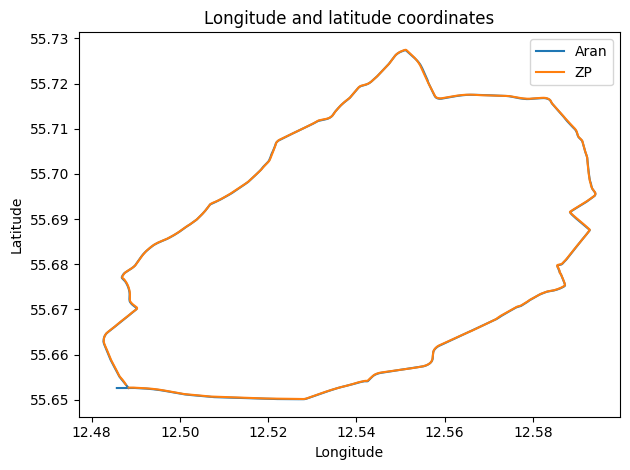

In [59]:
# Plot longitude and latitude coordinates for aran and zp
fig, ax = plt.subplots()

lat_aran_hh = data_aran_hh['Lat']
lon_aran_hh = data_aran_hh['Lon']
lat_zp_hh = data_zp_hh['Lat']
lon_zp_hh = data_zp_hh['Lon']

ax.plot(lon_aran_hh, lat_aran_hh, label='Aran')
ax.plot(lon_zp_hh, lat_zp_hh, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

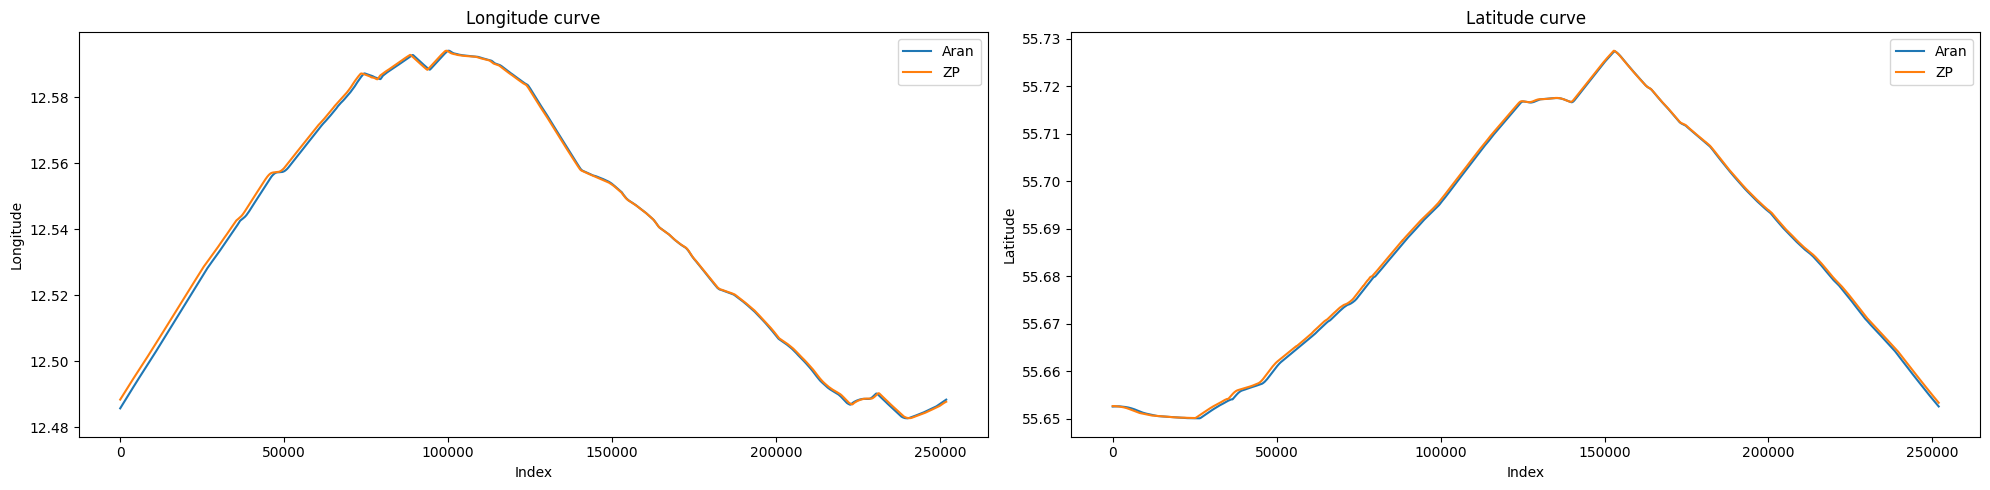

In [30]:
# Plot longitude curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(np.linspace(0, len(lon_zp_hh), len(lon_aran_hh)), lon_aran_hh, label='Aran')
ax1.plot(np.linspace(0, len(lon_zp_hh), len(lon_zp_hh)), lon_zp_hh, label='ZP')
ax1.set_xlabel('Index')
ax1.set_ylabel('Longitude')
ax1.set_title('Longitude curve')
ax1.legend()

# Plot latitude curve
ax2.plot(np.linspace(0, len(lat_zp_hh), len(lat_aran_hh)), lat_aran_hh, label='Aran')
ax2.plot(np.linspace(0, len(lat_zp_hh), len(lat_zp_hh)), lat_zp_hh, label='ZP')
ax2.set_xlabel('Index')
ax2.set_ylabel('Latitude')
ax2.set_title('Latitude curve')
ax2.legend()

plt.tight_layout()
plt.show()

In [33]:
def unpack_hdf5(hdf5_file):
    with h5py.File(hdf5_file, 'r') as f:
        data = unpack_hdf5_(f)
    return data

def unpack_hdf5_(group):
    data = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            data[key] = unpack_hdf5_(group[key])
        else:
            data[key] = group[key][()]
    return data

In [34]:
data_autopi_hh = unpack_hdf5('../data/raw/autopi/platoon_CPH1_HH.hdf5')

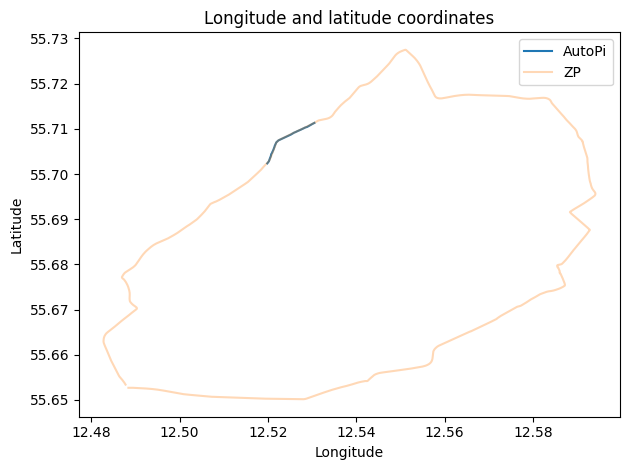

In [94]:
# plot longitude and latitude coordinates for AutoPi and ZP
fig, ax = plt.subplots()

autopi_hh_gps = data_autopi_hh['GM']['16010']['pass_5']['gps']

ax.plot(autopi_hh_gps[:, 2], autopi_hh_gps[:, 1], label='AutoPi')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

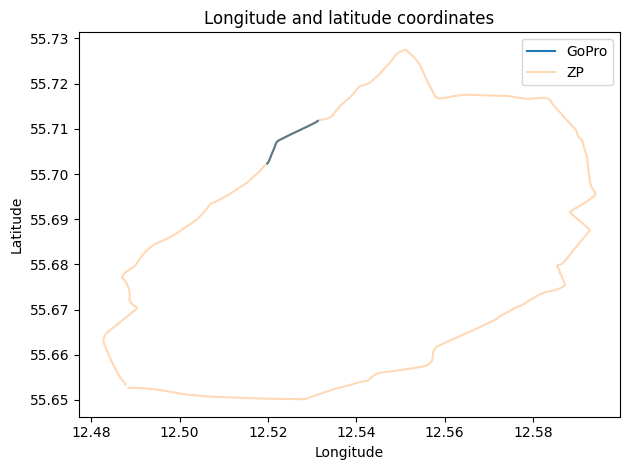

In [78]:
gopro_gps = data_autopi_hh['gopro']['trip_1']['pass_1']['gps'][:, 3:5]

fig, ax = plt.subplots()

ax.plot(gopro_gps[:, 1], gopro_gps[:, 0], label='GoPro')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

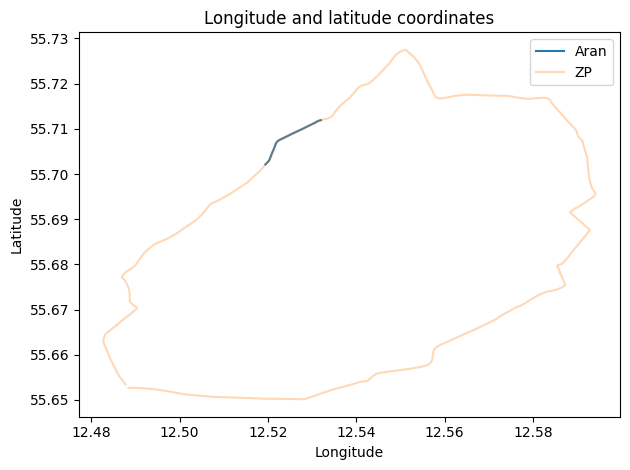

In [92]:
autopi_aran_gps = data_autopi_hh['aran']['trip_1']['pass_1']['GPS']

fig, ax = plt.subplots()

ax.plot(autopi_aran_gps[:, 1], autopi_aran_gps[:, 0], label='Aran')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

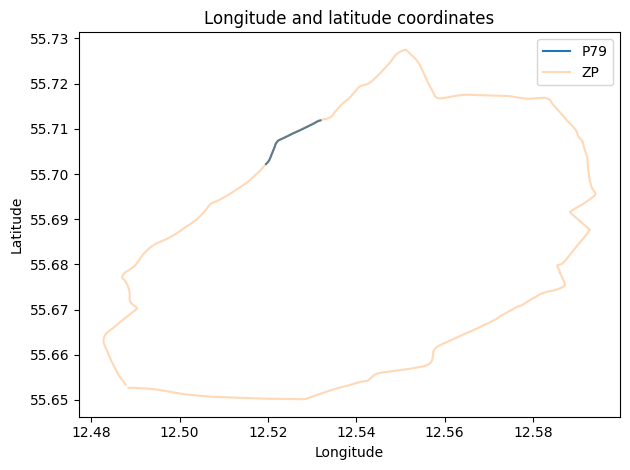

In [91]:
autopi_p79_gps = data_autopi_hh['p79']['trip_1']['pass_1']['GPS']

fig, ax = plt.subplots()

ax.plot(autopi_p79_gps[:, 1], autopi_p79_gps[:, 0], label='P79')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

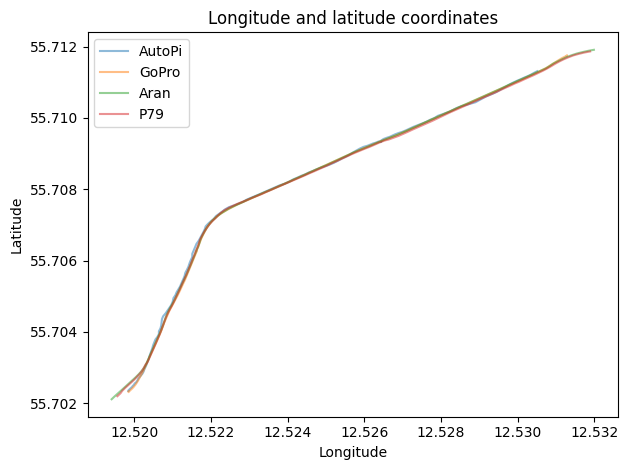

In [96]:
# Plot all autopi gps data
fig, ax = plt.subplots()

ax.plot(autopi_hh_gps[:, 2], autopi_hh_gps[:, 1], alpha=0.5, label='AutoPi')
ax.plot(gopro_gps[:, 1], gopro_gps[:, 0], alpha=0.5, label='GoPro')
ax.plot(autopi_aran_gps[:, 1], autopi_aran_gps[:, 0], alpha=0.5, label='Aran')
ax.plot(autopi_p79_gps[:, 1], autopi_p79_gps[:, 0], alpha=0.5, label='P79')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()


In [97]:
data_autopi_hh['p79']['trip_1']['pass_1'].keys()

dict_keys(['Crossfall', 'GPS', 'IRI', 'MPD', 'Rutting', 'TransversalProfile', 'Velocity'])

In [107]:
laser_autopi = data_autopi_hh['p79']['trip_1']['pass_1']['TransversalProfile']

laser_data = data_zp_hh.to_numpy()[:, 1:26]


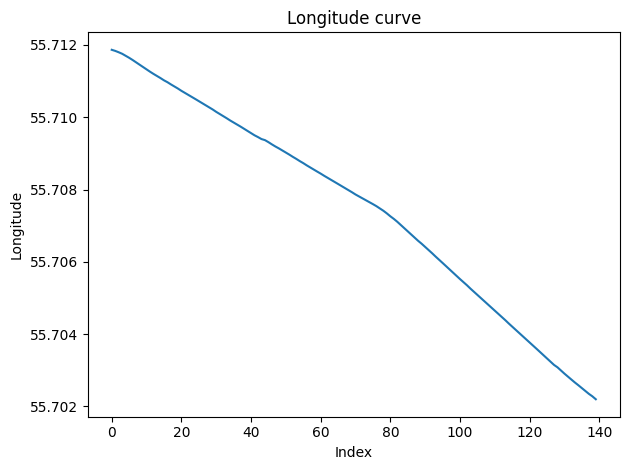

In [114]:
fig, ax = plt.subplots()

ax.plot(autopi_p79_gps[:, 0])
ax.set_xlabel('Index')
ax.set_ylabel('Longitude')
ax.set_title('Longitude curve')
plt.tight_layout()
plt.show()

In [111]:
data_autopi_hh['p79']['trip_1']['pass_1']['Rutting'].shape

(140, 4)